# TASK 2 - DENSE NETWORK USING MNIST

This network is based on the following link:
https://victorzhou.com/blog/keras-neural-network-tutorial/  
It's made using keras from tensorflow using a 3-channels model.
However, we'll be going a bit deeper, building enough classifiers to create ROC curves to each class and to each pair of classes.

In [1]:
!pip install mnist

download data

In [2]:
import numpy as np
import mnist
from tensorflow import keras

# The first time you run this might be a bit slow, since the
# mnist package has to download and cache the data.
x_data = mnist.train_images()
y_data = mnist.train_labels()
num_classes = len(np.unique(y_data))

print(x_data.shape) # (60000, 28, 28)
print(y_data.shape) # (60000,)
print(num_classes)

(60000, 28, 28)
(60000,)
10


Preparing data and normalyzing

In [3]:
import numpy as np
import mnist
from tensorflow import keras

x_test = mnist.test_images()
y_test = mnist.test_labels()

# Normalize the images.
x_data = (x_data / 255) - 0.5
x_test = (x_test / 255) - 0.5

# Flatten the images.
x_data = x_data.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

print(x_data.shape) # (60000, 784)
print(x_test.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


SOME FUNCTIONS TO DEFINE (YOU MAY SKIP THIS PART)

In [4]:
def class_choose(y_data, y_test, x):
    y_data = (y_data == x)
    y_test = (y_test == x)
    return y_data, y_test

import matplotlib.pyplot as plt

def roc_graph(fpr, tpr, x, auc):
    plt.figure()
    plt.plot([0, 1], [0, 1], 'k--') # k = color black
    plt.plot(fpr, tpr, label="predict" + str(x) + "& AUC: %.3f" % auc,
             color='C'+str(x), linewidth=3) # for color 'C'+str(j), for j[0 9]
    plt.legend(loc='lower right', ncol=1, mode="expand")
    plt.title('ROC for Character %s' % x)
    plt.xlabel('false positive rate', fontsize=14)
    plt.ylabel('true positive rate', fontsize=14)
    
    plt.savefig("ROCLensDetectNet_ch_{}.png". format(x))

Model creation

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 54,530
Trainable params: 54,530
Non-trainable params: 0
_________________________________________________________________


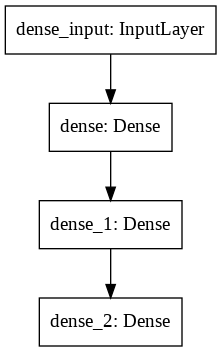

In [5]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras import utils
from keras.utils import to_categorical
from IPython.display import Image, display
from keras.utils import plot_model

model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(2, activation='softmax'),
])
############COMPILANDO O MODELO.

model.summary()

plot_model(model,  to_file="model_MNIST.png")
display(Image('model_MNIST.png'))

AGORA VAMOS BOTAR PRA RODAR!

6
 ** Loading model for character:  5
 ** Shapes: y_data: (60000,), y_test: (10000,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 54,530
Trainable params: 54,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0666 - accuracy: 0.9766
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0304 - accuracy: 0.9898
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0246 - accuracy: 0.9917


ValueError: ignored

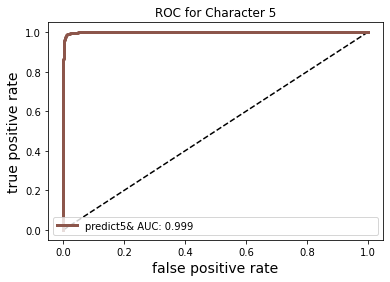

In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

###TO REUSE THE INITIAL WEIGHTS - EFFECTIVELY A RESET
saved_w = model.get_weights()
print(len(saved_w)) 

for y in range(5,num_classes,1):
    print(' ** Loading model for character: ', y)
    y_data, y_test = class_choose(y_data, y_test, y)
    print(' ** Shapes: y_data: %s, y_test: %s' % (y_data.shape, 
                                                  y_test.shape))
    model.set_weights(saved_w)
    model.compile(optimizer='adam',loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary()
    model.fit(x_data, to_categorical(y_data), epochs=5,
              batch_size = 64)
    preds = model.predict(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, preds[:,1])
    auc = roc_auc_score(y_test, preds[:,1])

    roc_graph(fpr, tpr, y, auc)

    loss, acc = model.evaluate(x_test, to_categorical(y_test))
    print('\n ** Loss = %s; Acc = %s.' % (loss,acc))